<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint5/Module2/O2_UseSciKitLearnToFitAMulipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import pandas and seaborn
import pandas as pd
import numpy as np
import seaborn as sns

# Load the data into a DataFrame
penguins = sns.load_dataset("penguins")

display(penguins.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


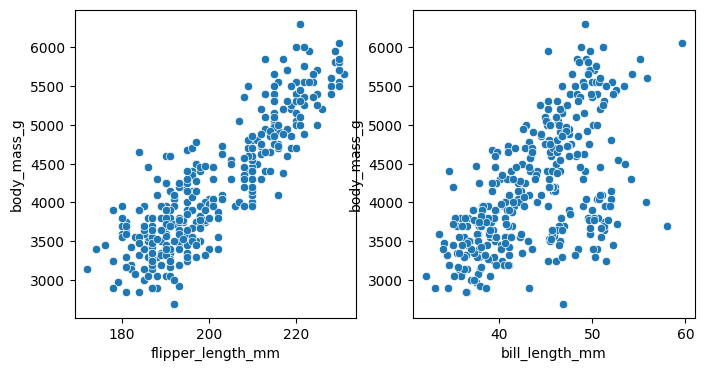

<Figure size 640x480 with 0 Axes>

In [3]:
# Import
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data=penguins, ax = ax1)
sns.scatterplot(x="bill_length_mm", y="body_mass_g", data=penguins, ax = ax2)

plt.show()
plt.clf()

In [4]:
# Remove NaN before creating features
penguins.dropna(inplace=True)

# Create the 2-D features matrix
features = ['flipper_length_mm', 'bill_length_mm']
X_penguins = penguins[features]

# Create the target vector
y_penguins = penguins['body_mass_g']

# Import the estimator class
from sklearn.linear_model import LinearRegression

# Instantiate the class (with default parameters)
model = LinearRegression()

# Fit the model
model.fit(X_penguins, y_penguins)

LinearRegression()

In [5]:
# Slope (2 parameters here)
print(model.coef_)

# Intercept
print(model.intercept_)

[48.88969177  4.95860126]
-5836.298732120461


To create a plot with 2 features, we will need either color shading or a 3D plot.

In [6]:
# Format the data for plotting
x_flipper = penguins['flipper_length_mm']
y_bill = penguins['bill_length_mm']
z_weight = penguins['body_mass_g']

# Create the data to plot the best-fit plane
(x_plane, y_plane) = np.meshgrid(np.arange(165, 235, 1), np.arange(30, 60, 1))
z_plane = -5836 + 49*x_plane + 5*y_plane

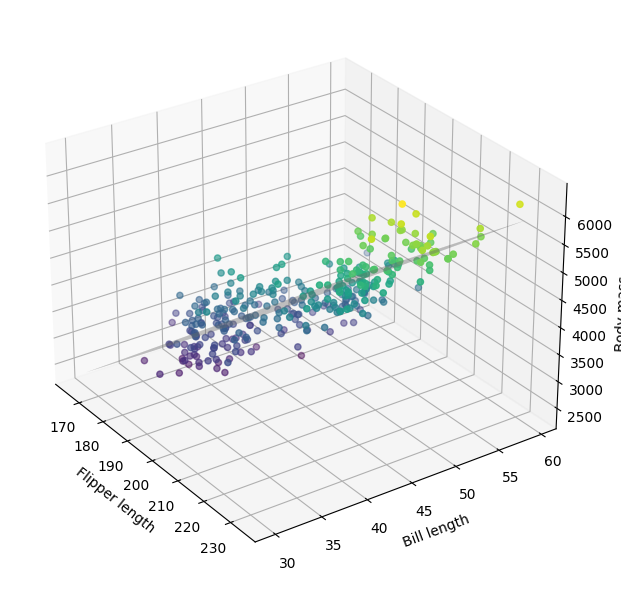

<Figure size 640x480 with 0 Axes>

In [7]:
# Import for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Initial the figure and axes objects
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data: 2 features, 1 target
ax.scatter(xs=x_flipper, ys=y_bill, zs=z_weight, zdir='z',
           s=20, c=z_weight, cmap=cm.viridis)

# Plot the best-fit plane
ax.plot_surface(x_plane, y_plane, z_plane, color='gray', alpha = 0.5)

# General figure/axes properties
ax.view_init(elev=28, azim=325)
ax.set_xlabel('Flipper length')
ax.set_ylabel('Bill length')
ax.set_zlabel('Body mass')
fig.tight_layout()

plt.show()
plt.clf()